In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [14]:
%cd Project_final

/content/gdrive/My Drive/Project_final


In [15]:
%ls

Campfire/  research.ipynb


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [17]:
import pathlib
data_dir = pathlib.Path('/content/gdrive/My Drive/Project_final/Campfire')

In [19]:
image_count = len(list(data_dir.glob('*/*.tif')))
print(image_count)

6225


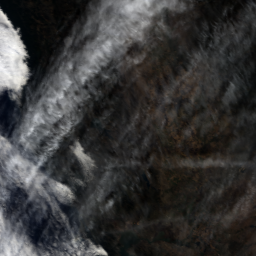

In [43]:
cloud = list(data_dir.glob('Cloud/*'))
PIL.Image.open(str(cloud[0]))

In [53]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(280, 280), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(280, 280), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 4983 images belonging to 7 classes.
Found 1242 images belonging to 7 classes.


In [60]:
print(train_dataset.class_indices)

{'Cloud': 0, 'Dust': 1, 'Haze': 2, 'Land': 3, 'Seaside': 4, 'Smoke': 5, 'Testing': 6}


AttributeError: ignored

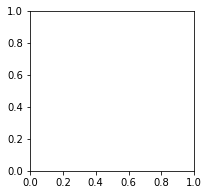

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images in train_dataset:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# packages
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import folium
from folium.plugins import HeatMap

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from mlxtend.plotting import ecdf # empirical CDF plot

In [ ]:
df = pd.read_csv('California_Fire_Incidents.csv')
df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,10,NaN,NaN,NaN,2013-09-24T20:15:00Z,NaN,False,True,NaN,NaN,NaN,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,100.0,NaN,True,The Aspen Fire burned in July 2013 seven miles...,"217 Aspen Fire, July 2013, Big Creek, Fresno ...",2013-07-22T22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,33,63.0,20.0,201.0,2013-08-12T18:00:00Z,NaN,False,True,NaN,20.0,26.0,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,100.0,2106.0,True,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,Finalized,8.0,40.0,NaN,NaN

In [ ]:
# show all column names
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [ ]:
#http request
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid= 2ed166fe6314c9803ecbfc63f100985f'
p = "%Y-%m-%dT%H:%M:%SZ"
epoch = datetime(1970,1,1)
for i,row in df.head(10).iterrows():
  time = ((datetime.strptime(row.Started, p) - epoch).total_seconds())
  url = base_url.format(row.Lat, row.Lon)
  res = requests.get(url)
  res_json = res.json()
  current = res_json['current']
  for each in current:
    if current['dt'] == time:
      print(current)
      row['APIdate'] = current

print(df.head(10))

#filter_res = []
#print(response.json()[current][])

In [ ]:
df.Counties.value_counts()[0:10]

Riverside          146
San Diego           89
Butte               66
Shasta              64
San Luis Obispo     64
Kern                62
Siskiyou            57
Fresno              57
San Bernardino      53
Tehama              51
Name: Counties, dtype: int64

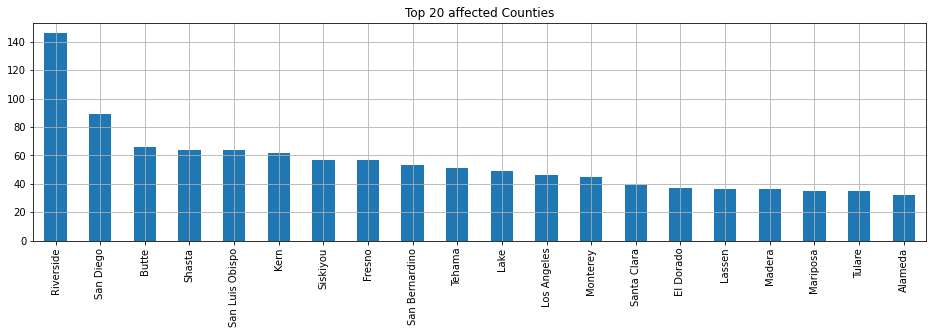

In [ ]:
plt.figure(figsize=(16,4))
df.Counties.value_counts()[0:20].plot(kind='bar')
plt.title('Top 20 affected Counties')
plt.grid()
plt.show()

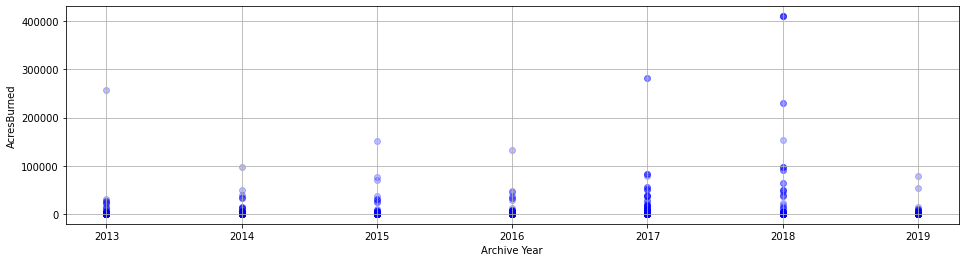

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(df.ArchiveYear, df.AcresBurned, color='blue', alpha=0.25)
plt.xlabel('Archive Year')
plt.ylabel('AcresBurned')
plt.grid()
plt.show()

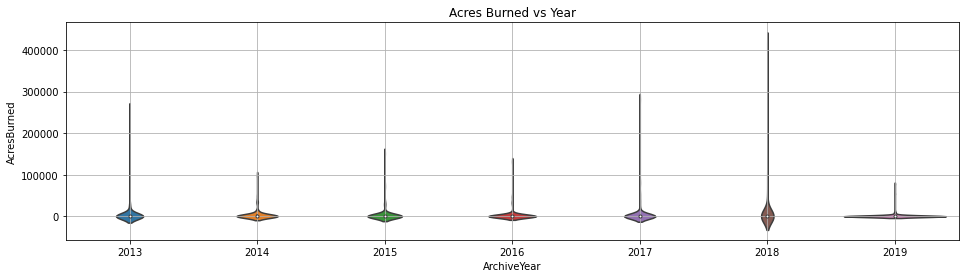

In [ ]:
plt.figure(figsize=(16,4))
sns.violinplot(x='ArchiveYear', y='AcresBurned', data=df)
plt.grid()
plt.title('Acres Burned vs Year')
plt.show()

In [ ]:
df['log10AcresBurned'] = np.log10(df.AcresBurned+0.1)

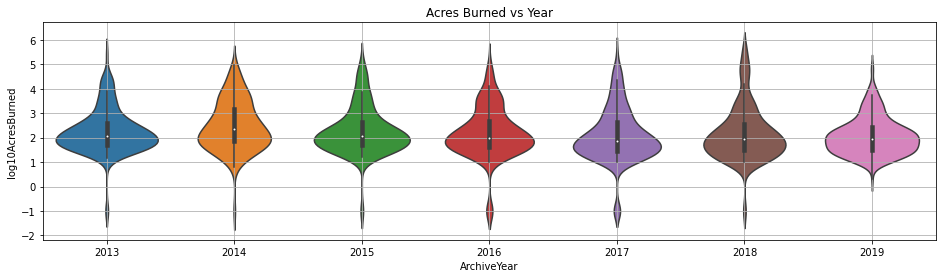

In [ ]:
plt.figure(figsize=(16,4))
sns.violinplot(x='ArchiveYear', y='log10AcresBurned', data=df)
plt.grid()
plt.title('Acres Burned vs Year')
plt.show()

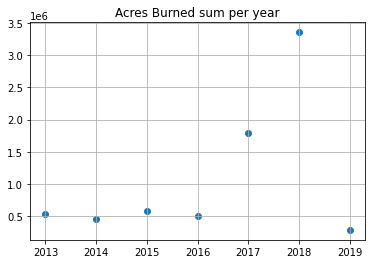

In [ ]:
acres_sum = df.groupby(by='ArchiveYear').AcresBurned.sum()
acres_sum
plt.scatter(acres_sum.index, acres_sum)
plt.grid()
plt.title('Acres Burned sum per year')
plt.show()

In [ ]:
# fatalities per year
fatalities_sum = df.groupby(by='ArchiveYear').Fatalities.sum()
fatalities_sum

ArchiveYear
2013      0.0
2014      0.0
2015      1.0
2016      0.0
2017     75.0
2018    102.0
2019      3.0
Name: Fatalities, dtype: float64

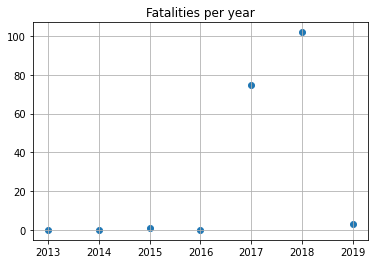

In [ ]:
plt.scatter(fatalities_sum.index, fatalities_sum)
plt.grid()
plt.title('Fatalities per year')
plt.show()

In [ ]:
cond_statements = df.ConditionStatement[~df.ConditionStatement.isna()]
cond_statements

4       Acreage has been reduced based upon more accur...
6       Firefighters closed the containment lines toda...
9       Fire suppression repair will continue througho...
10      California Incident Management Team 5 will tra...
12      Firefighters continue to mop up within the fir...
                              ...                        
1609                            Forward progress stopped.
1612                               Forward spread stopped
1615    Forward rate of spread has been stopped. CAL F...
1626    <p>Great response by fire crews. Forward progr...
1635    As of 10:00 p.m. on 10/16, the fire is 90% con...
Name: ConditionStatement, Length: 284, dtype: object

In [ ]:
stopwords = set(STOPWORDS)
# add more context specific stopwords
stopwords.update({'www','href','http','https'})

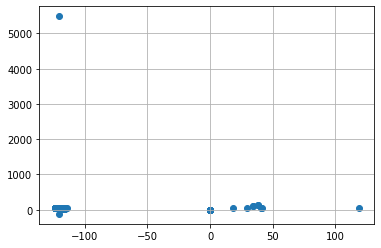

In [ ]:
plt.scatter(df.Longitude, df.Latitude)
plt.grid()
plt.show()

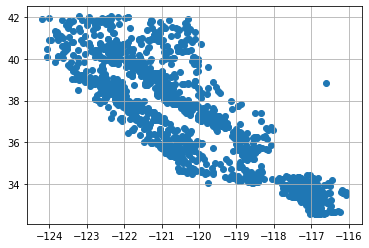

In [ ]:
df_select = df[df.Longitude<-115]
df_select = df_select[(df_select.Latitude<44) & (df_select.Latitude > 30)]
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

In [ ]:
zoom_factor = 5
radius_scaling = 50 

my_map_1 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df_select.shape[0]):
   folium.Circle(
      location=[df_select.iloc[i]['Latitude'], df_select.iloc[i]['Longitude']],
      radius=np.sqrt(df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + df_select.iloc[i]['CanonicalUrl'] + ' - Year:' + str(int(df_select.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(df_select.iloc[i]['AcresBurned']),
      fill=True,
      fill_color='red'
   ).add_to(my_map_1)

my_map_1

In [ ]:
df_select_2018 = df_select[df_select.ArchiveYear==2018]

In [ ]:
zoom_factor = 5 # inital map size
radius_scaling = 50 # scaling of bubbles

my_map_2 = folium.Map(location=[36,-120], zoom_start=zoom_factor)

for i in range(0,df_select_2018.shape[0]):
   folium.Circle(
      location=[df_select_2018.iloc[i]['Latitude'], df_select_2018.iloc[i]['Longitude']],
      radius=np.sqrt(df_select_2018.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      popup='CanonicalUrl:' + df_select_2018.iloc[i]['CanonicalUrl'] + ' - Year:' + str(int(df_select_2018.iloc[i]['ArchiveYear'])) + ' - Acres Burned:' 
      + str(df_select_2018.iloc[i]['AcresBurned']),
      fill=True,
      fill_color='red'
   ).add_to(my_map_2)
my_map_2

In [ ]:
print(df.Latitude[0])

In [ ]:
#http request
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid= 2ed166fe6314c9803ecbfc63f100985f'
p = "%Y-%m-%dT%H:%M:%SZ"
epoch = datetime(1970,1,1)
for i,row in df.head(10).iterrows():
  time = ((datetime.strptime(row.Started, p) - epoch).total_seconds())
  url = base_url.format(row.Latitude, row.Longitude)
  res = requests.get(url)
  res_json = res.json()
  current = res_json['current']
  for each in current:
    if current['dt'] == time:
      print(current)
      row['APIdate'] = current

print(df.head(10))

#filter_res = []
#print(response.json()[current][])